In [8]:
path = "/dtu/3d-imaging-center/courses/02509/groups/group01/statistics/"

# load npy file from the path
import numpy as np
import os
import pandas as pd

# import pandas frame
df_sample_3 = pd.read_csv(path + "statistics_sample_3.csv")
df_sample_4 = pd.read_csv(path + "statistics_sample_4.csv")
df_sample_5 = pd.read_csv(path + "statistics_sample_5.csv")


print(df_sample_3.head())

      ratio  mean_thickness_stone  mean_thickness_bubbles  \
0  0.756010              1.957572                0.769248   
1  0.808469              1.042226                0.649100   
2  0.439130              0.989864                1.000067   
3  0.538265              0.903176                0.830195   
4  0.773654              0.845630                0.637488   

   median_thickness_stone  median_thickness_bubbles  max_thickness_stone  \
0                2.207705                  0.757391             2.660572   
1                1.064715                  0.682785             1.423666   
2                0.750473                  1.079865             1.977087   
3                0.856279                  0.870300             1.607189   
4                0.784894                  0.738777             1.504338   

   max_thickness_bubbles  var_thickness_stone  var_thickness_bubbles label  
0               1.309358             0.576693               0.061252    ny  
1               1.0761

In [35]:
from sklearn.decomposition import PCA

def perform_pca(dataframe, n_components):
    
    # get all columns except the last one
    dataframe = dataframe.iloc[:, :-1]
    pca = PCA(n_components=n_components)
    
    return pca.fit_transform(dataframe)



In [36]:
# perform pca on the data
X_pca_sample_3  = perform_pca(df_sample_3, len(df_sample_3.columns) - 1)
X_pca_sample_4  = perform_pca(df_sample_4,len(df_sample_4.columns) - 1)
X_pca_sample_5  = perform_pca(df_sample_5,len(df_sample_5.columns) - 1)

print(X_pca_sample_3)

[[ 2.53342902e-01  2.18863140e+00  4.14579496e-02 ...  1.67998800e-02
  -3.70416924e-02  3.88730219e-02]
 [-4.23417919e-01  3.65456630e-01 -2.24388821e-01 ...  1.45332141e-02
  -1.26633188e-02 -2.12660945e-02]
 [ 3.76706137e-01  3.32504114e-01  5.44452896e-01 ...  1.57441993e-02
  -7.11650342e-02 -9.25960070e-02]
 ...
 [-1.03391417e+00 -5.42457731e-01 -1.42950043e-01 ...  6.47362922e-02
  -4.52310715e-03  1.84891510e-02]
 [-9.87086046e-01 -6.43005512e-01  1.09201911e-02 ...  1.87352183e-02
   1.92602344e-02  1.73770357e-02]
 [-1.07000828e+00 -5.03212796e-01 -1.45431581e-01 ...  7.40617283e-02
   8.81376868e-03 -3.37146874e-04]]


[1, 2, 3, 4, 5, 6, 7, 8]


Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

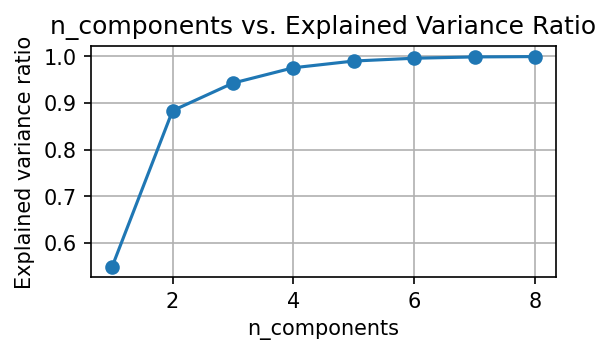

In [37]:
import matplotlib.pyplot as plt

var_ratio = []
nums = len(df_sample_3.columns) - 1

# create a list of numbers from 0 to 9
nums = [num for num in range(1,9)]

print(nums)
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(df_sample_5.iloc[:, :-1])
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(4,2),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

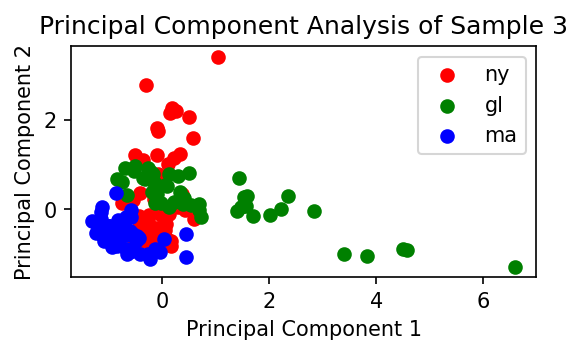

In [55]:
# two principal components is enough to explain 90% of the variance in the data

X_pca_sample_3  = perform_pca(df_sample_3,2)
X_pca_sample_4  = perform_pca(df_sample_4,2)
X_pca_sample_5  = perform_pca(df_sample_5,2)


# add the labels to the data
label = df_sample_3.iloc[:,-1]

# add label to X_pca_sample_3
X_pca_sample_3 = np.column_stack((X_pca_sample_3,label))

# extract where the label is 0
X_pca_sample_3_label_ny = X_pca_sample_3[X_pca_sample_3[:,-1] == "ny"]
X_pca_sample_3_label_gl = X_pca_sample_3[X_pca_sample_3[:,-1] == "gl"]
X_pca_sample_3_label_ma = X_pca_sample_3[X_pca_sample_3[:,-1] == "ma"]

plt.figure(figsize=(4,2),dpi=150)
plt.scatter(X_pca_sample_3_label_ny[:,0],X_pca_sample_3_label_ny[:,1], color="r", label="ny")
plt.scatter(X_pca_sample_3_label_gl[:,0],X_pca_sample_3_label_gl[:,1], color="g", label="gl")
plt.scatter(X_pca_sample_3_label_ma[:,0],X_pca_sample_3_label_ma[:,1], color="b", label="ma")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Component Analysis of Sample 3')
plt.legend()
plt.show()